### Project Title

In [1]:
project_title="Titanic case"

# 1 system setup


**Credits :**   
https://github.com/Kaushik-Varma/Marketing_Data_Analysis   
https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14   
https://seaborn.pydata.org/generated/seaborn.boxplot.html   


**Working directory setup**
* **/Data/** for all data related maps
* **/Data/raw/** for all raw incoming data
* **/Data/clean/** for all clean data to be used during analysis
* **/Data/staging/** for all data save during cleaning 
* **/Data/temp/** for all tempral data saving 
* **/Figs/temp/** for all tempral data saving 
* **/Docs/** reference documentation
* **/Results/** reference documentation
* **/Code/** reference documentation


**references:**
https://docs.python-guide.org/writing/structure/



Setup packages required for analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

Set working directories 

In [3]:
print("Current working directory: {0}".format(os.getcwd()))


Current working directory: /Users/nadiaportier/Downloads


Code below created project structure

# 2 Import data

show contents of working directory

In [4]:
train_df = pd.read_csv('01_train.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3 Exploratory Data Analysis

## 3.1 inspectie van variabelen 

In [8]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 3.2 EDA per dataframe

Eerst kijken naar de veldnamen en data types

In [9]:
train_df.shape

(891, 12)

In [10]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Het valt op dat er waarden missen in de columns age cabin en embarked.
De column Sex zou omgezet kunnen worden naar het data type int waar: 0 = vrouw en man = 1.
Een ticket bestaat altijd uit cijfers, dus deze column zou van het data type int kunnen zijn.
De embarked column zou omgezet kunnen worden naar het data type string.



Dan kijken naar de statistieken van alle kolommen

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sommige kolommen worden niet getoond

In [13]:
pd.set_option("display.max_columns",       None)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3.2.1 kolommen splitsen / verwijderen / hernoemen

**verwijderen**

In [15]:
# Drop the customer id as it is of no use.
train_df.drop('Name', axis = 1, inplace = True)
train_df.drop('Ticket', axis = 1, inplace = True)
#train_df.drop('PassengerId', axis = 1, inplace = True)
train_df.drop('Cabin', axis = 1, inplace = True)

**Resultaat** 

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Dit is een mooi moment om de data op te slaan in de staging map
De data is nog niet schoon maar wel al bewerkt, dus niet in de clean map opslaan, 

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html
DataFrame.copy(deep=True)[source]
Make a copy of this object’s indices and data.

When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

In [17]:
train_df_staging = train_df.copy()

## 3.2.2 Datatypes rechtzetten

In [18]:
#train_df["Sex"].replace({"female": 0, "male": 1}, inplace=True)
train_df["Sex"].fillna(0, inplace=True)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## 3.2.4 generieke verkenning

In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [21]:
print(train_df.nunique(axis=0))

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64


Wat valt op:
- Er zijn drie verschillende klassen;
- Er zijn 88 verschillende leeftijden;
- Er zijn 7 verschillende waarden in de kolom SiblingSpouse;
- Er zijn 7 verschillende waarden in de kolom ParentsChildren;
- Er zijn 248 verschillende waarden in de kolom fare;

Welke relaties willen we toetsen
* Survived 
* Survived vs Sex
* Survived vs age
* Survived Pclass
* Survived vs Pclass vs age 
* Survived vs age vs sex 

In [22]:
# Checking the missing values
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


## 3.2 univariate data analyse

### Survival "barplot"

In [23]:
#not survived == 0, survived == 1

Survived = train_df[train_df['Survived'] == 1]
Not_Survived = train_df[train_df['Survived'] == 0]

#tabel weergave: # weghalen 
#Survived
#Not_Survived

In [24]:
#Not_Survived

In [25]:
#kan ook op andere manier
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [26]:
# percetage berekenen
train_df['Survived'].value_counts() *100/len(train_df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [27]:
# new dataframe
Survival_dataframe = pd.DataFrame({'Survival': ['Survived', 'Not_Survived', 'Total'],
                                  'count':[342, 549, 891],
                                           'Percentage':[38.38, 61.62, 100.00]})
Survival_dataframe

,Survival,count,Percentage
0,Survived,342,38.38
1,Not_Survived,549,61.62
2,Total,891,100.00


Text(0.5, 1.0, 'Barplot overview of survival')

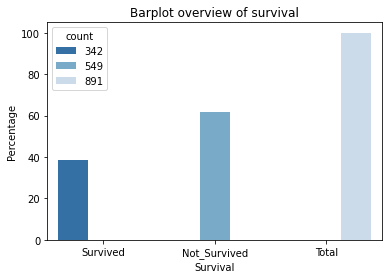

In [28]:
#visualisatie survival 
sns.barplot(x='Survival', y='Percentage', hue = 'count', palette="Blues_r",
            data=Survival_dataframe)
plt.title('Barplot overview of survival')

#### Waarom voor deze visualisatie gekozen? In een barplot is een duidelijk verschil te zien tussen survived en not survived. 

#### Uit deze visualisatie is op te maken dat er meer passagiers zijn overleden tov overleefd. Hierbij is ook het percentage weergegeven van ongeveer 40 om 60 survival.

### Sex / geslacht "Barplot"

In [29]:
# aantallen 
train_df[["Sex", "Survived"]].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [30]:
# percentages 
# de moeilijke berekening, dit kan ook gewoon handmatig maar meer stappen 
Gender_stats = train_df.groupby('Sex').Survived.value_counts()
Gender_pcts = Gender_stats.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
Gender_pcts

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

In [31]:
# new dataframe
Gender_dataframe = pd.DataFrame({'Sex': ["Female", "Female", "Male", "Male"],
                              'Survived': ['S','NS', 'S', 'NS'],
                             'Percentage':[74.20, 25.80, 18.89, 81.11]})
Gender_dataframe

,Sex,Survived,Percentage
0,Female,S,74.20
1,Female,NS,25.80
2,Male,S,18.89
3,Male,NS,81.11


Text(0.5, 1.0, 'Barplot Gender survival')

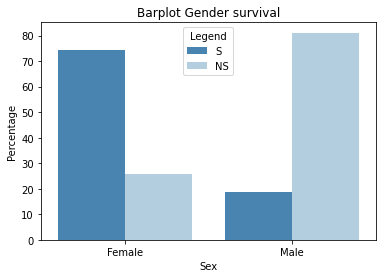

In [32]:
# visualisatie van de gender 
sns.barplot(x='Sex', y='Percentage', hue = 'Survived', palette="Blues_r",
            data=Gender_dataframe)
plt.legend(title='Legend')
plt.title('Barplot Gender survival')

Herhaling: Barplot toont de relatie tussen een numerieke en een categorische variabele. De balken is de nummerieke data.
#### Hieruit is op te maken dat mannen een lagere overlevingskans hebben, ongeveer 20 om 80 procent. 
#### Vrouwen hebben een hogere overlevingskans, dit is ongeveer 25 om 75

### Age "histogram"

#### Hieruit is op te maken dat mannen een lagere overlevingskans hebben, ongeveer 20 om 70 procent

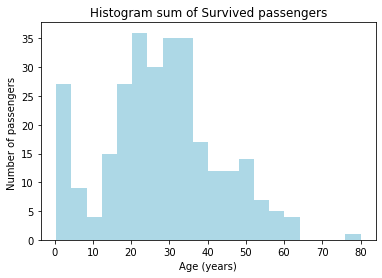

In [33]:
# histogram is een staafgrafiek waarin wordt weergeven hoe vaak iets voorkomt binnen een groep
# matplotlib.pyplot packages 
plt.hist(Survived['Age'], color='lightblue', bins= 20)
plt.title('Histogram sum of Survived passengers')
plt.xlabel('Age (years)')
plt.ylabel('Number of passengers ')
plt.show()

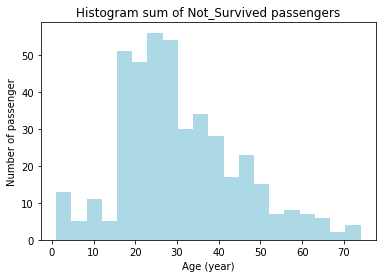

In [34]:
plt.hist(Not_Survived['Age'], color='lightblue', bins= 20)
plt.title('Histogram sum of Not_Survived passengers')
plt.xlabel('Age (year)')
plt.ylabel('Number of passenger')
plt.show()

#### Hier is een Histogram weergegeven van de spreiding van de leeftijden tegen de hoeveelheid overlevende passagiers. 

#### kinderen ongeveer tussen de 0-10 hebben wel een grotere overlevingskans volgens de histogram. 
#### ouder dan 40 jaar is je overlevingskans minder 
#### Hieruit is op te maken dat de spreiding erg groot is, en dus de leeftijd opnieuw geen inpact heeft op de overlevingskans. Zie scatterplot 


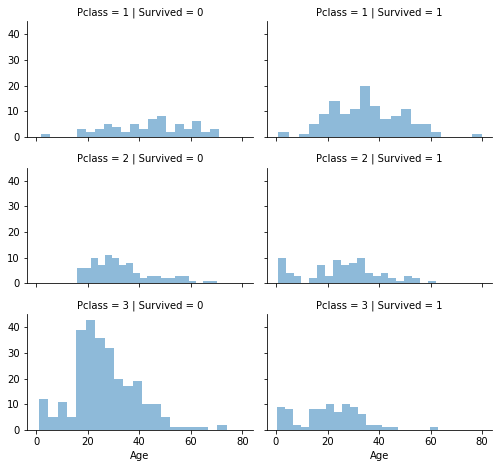

In [35]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

## 3.3 multivariate data analysis

Text(0.5, 1.0, 'Correlatie Heatmap')

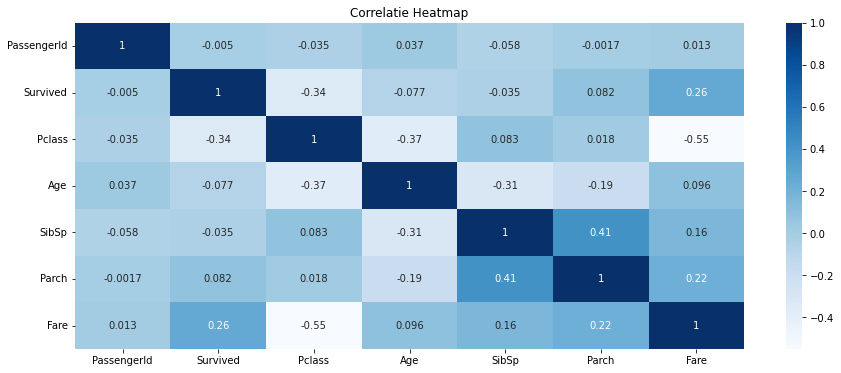

In [36]:
# Seaborn heatmap gebruikt
# vmax: max bereik
# cmap: kleuren: https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps
# annot: True= waarde zichtbaar , False= niet zichtbaar
# cbar: bij False, verdwijnt de kleurenbalk

fig,ax = plt.subplots(figsize=(15,6))
sns.heatmap(train_df.corr(), vmax=1.0, square=False, annot=True, cmap="Blues")
ax.set_title('Correlatie Heatmap')


#### Hoe verder van 1 vandaan "hoe lichter de blauwe kleur is" des te meer correlatie er tussen survived en ... is. 

#### In de heatmap is de meeste correlatie is tussen Pclass en Survived, minste correlatie is de passangerId , en deze kan dus gedropt worden. 

#### De sex staat niet in de heatmap wat wel zou moeten maar dat heeft de hoogste correlatie.

Text(0.5, 1.0, 'Scatterplot age versus survival')

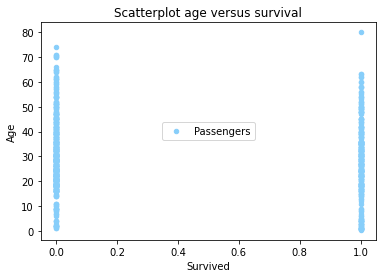

In [37]:
#plot the scatter plot of balance and salary variable in data
train_df.plot(kind='scatter', x='Survived', y='Age', label= 'Passengers', color='lightskyblue')
plt.legend(loc='center')
plt.title("Scatterplot age versus survival")

#### Hier is gebruik gemaakt van de scatterplot. 

#### Hieruit is de overleving tegen de leeftijd elkaar aan geplot. De 0 staat voor not survived en de 1 voor survived. Er is een grote spreiding over de leeftijd te zien bij zowel survived als not survived. Hieruit blijkt dus dat de leeftijd geen impact heeft op de overlevingskans. Dit is ook terug te herleiden naar de heatmap 

In [38]:
#Percentage  
class_stats = train_df.groupby('Pclass').Survived.value_counts()
pcts = class_stats.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
pcts

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Survived, dtype: float64

In [39]:
#nieuwe dataframe 
Classe_dataframe = pd.DataFrame({'Pclass': [1,1,2,2,3,3],
                              'Survived': ['S','NS', 'S', 'NS', 'S', 'NS'],
                             'Percentage':[62.96, 37.04, 47.28, 52.72, 24.24, 75.76]})
Classe_dataframe

,Pclass,Survived,Percentage
0,1,S,62.96
1,1,NS,37.04
2,2,S,47.28
3,2,NS,52.72
4,3,S,24.24
5,3,NS,75.76


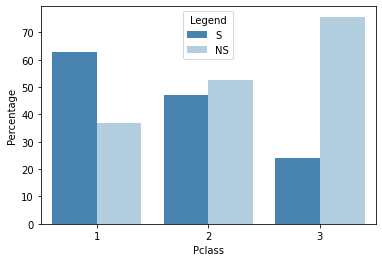

In [40]:
#visualisatie classe dataframe

#Overlevingskans is groter bij eerste klasse dan bij de 3e klasse. 
#Duidelijke afname en toename in de percentages tov de klasse
sns.barplot(x='Pclass', y='Percentage', hue = 'Survived', palette="Blues_r",
            data=Classe_dataframe)
plt.legend(title='Legend')

#### in deze barplot zijn de klassen met elkaar vergeleken ten opzichte van het survival percentage. 

#### Hieruit is op te maken dat de overlevingkans hoger is als je in de eerste klasse hebt gezeten en laagste in de derde klasse. 
#### De klasse waar je in zit heeft dus zeker invloed op je overleving 

/Users/nadiaportier/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


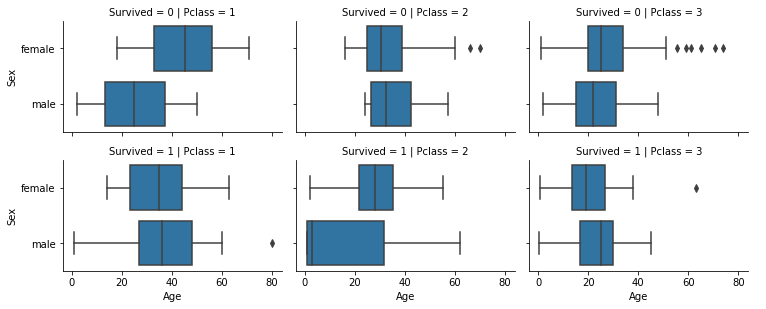

In [41]:
grid = sns.FacetGrid(train_df, col='Pclass', row='Survived', height=2.2, aspect=1.6)
grid.map(sns.boxplot, 'Age', 'Sex')
grid.add_legend();

#### 
Klasse 1 overleden:
- In klasse 1 kan je zien dat de leeftijd van de overleden mannen tussen de ongeveer 1 en 50 jaar ligt;
- De leeftijd van de overleden vrouwen in klasse 1 ligt tussen de ongeveer 18 en 70 jaar;
- Het grootste deel van de overleden mannen in klasse 1 is tussen de ongeveer 16 en 38 jaar;
- Het grootste deel van de overleden vrouwen in klasse 1 is tussen de ongeveer 30 en 55 jaar;
- Het mediaan van de overleden passagiers in klasse 1 ligt bij de vrouwen op ongeveer 50 en bij de mannen op 28.
Klasse 1 overleefd:
- In klasse 2 kan je zien dat de leeftijd van overleefde mannen tussen de ongeveer 1 en 60 jaar ligt met een outlier van 80;
- De leeftijd van de overleefde vrouwen in klasse 1 ligt tussen de ongeveer 16 en 65 jaar;
- Het grootste deel van de overleefde mannen in klasse 1 is tussen de ongeveer 28 en 48 jaar;
- Het grootste deel van de overleefde vrouwen in klasse 1 is tussen de ongeveer 25 en 45 jaar;
- Het mediaan van de overleefde passagiers in klasse 1 ligt bij de vrouwen op ongeveer 37 en bij de mannen op 38.
Klasse 2 overleden:
- In klasse 2 kan je zien dat de leeftijd van de overleden mannen tussen de ongeveer 25 en 58 jaar ligt;
- De leeftijd van de overleden vrouwen in klasse 2 ligt tussen de ongeveer 15 en 60 jaar met twee outliers van boven de 60;
- Het grootste deel van de overleden mannen in klasse 2 ligt tussen de ongeveer 25 en 42 jaar;
- Het grootste deel van de overleden vrouwen in klasse 2 ligt tussen de ongeveer 24 en 38 jaar;
- Het mediaan van de overleden passagier in klasse 2 ligt bij de vrouwen op 30 en bij de mannen op 31;
Klasse 2 overleefd:
- In klasse 2 kan je zien dat de leeftijd van de overleefde mannen tussen de ongeveer 0 en 62 jaar ligt;
- De leeftijd van de overleefde vrouwen in klasse 2 ligt tussen de ongeveer 1 en 57 jaar;
- Het grootste deel van de overleefde mannen in klasse 2 ligt tussen de ongeveer 0 en 30 jaar;
- Het grootste deel van de overleefde vrouwen in klasse 2 ligt tussen de ongeveer 20 en en 32 jaar;
- Het mediaan van de overleefde passagiers ligt bij de vrouwen op 30 en bij de mannen op 2;
Klasse 3 overleden:
- In klasse 3 kan je zien dat de leeftijd van de overleden mannen tussen de ongeveer 2 en 48 jaar ligt;
- De leeftijd van de overleden vrouwen in klasse 3 ligt tussen de ongeveer 1 en 50 jaar met outliers van boven de 50;
- Het grootste deel van de overleden mannen in klasse 3 ligt tussen de ongeveer 17 en 30 jaar;
- Het grootste deel van de overleden vrouwen in klasse 3 ligt tussen de ongeveer 20 en 32 jaar;
- Het mediaan van de overleden passagiers ligt bij de vrouwen op ongeveer 23 en bij de mannen op 22;
Klasse 3 overleefd:
- In klasse 3 kan je zien dat de leeftijd van de overleefde mannen tussen de ongeveer 0 en 45 jaar ligt;
- De leeftijd van de overleefde vrouwen ligt tussen de ongeveer 0 en 38 jaar;
- Het grootste deel van de overleefde mannen in klasse 3 ligt tussen de ongeveer 18 en 30 jaar;
- Het grootste deel van de overleefde vrouwen in klasse 3 ligt tussen de ongeveer 16 en 27 jaar;
- Het mediaan van de overleden passagiers ligt bij de vrouwen op ongeveer 20 en bij de mannen op 25 jaar;
Overige observaties:
- De overlevende zijn grotendeel jonger dan de passagiers die zijn overleden dit geldt voor alle klassen;
- In klassen 1 & 2 zijn er geen vrouwen overleden van onder de 15;
- In klasse 2 zijn er geen mannen van jonger dan 20 overleden, en een grote groep mannen van tussen de 0 en 30 heeft het overleefd.

## 4.2 data inputation of missing values

**Missing Values**

If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.
There are mainly three types of missing values.
* MCAR(Missing completely at random): These values do not depend on any other features.
* MAR(Missing at random): These values may be dependent on some other features.
* MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

credits: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14


In [42]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


In de kolom age, cabin en embarked ontbreken er waarden.
In de kolom age en embarked kunnen we de waarden opvullen door de mediaan en modus.

In [43]:
print(train_df["Age"].median())
print(train_df["Embarked"].mode())

28.0
0    S
dtype: object


In [44]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# 5 Building a model

In [45]:
Voorspelling = []


for index, row in test_df.iterrows():
    overlevingskans = 10

    if row['Pclass'] == 1:

        overlevingskans = overlevingskans + 3
    elif row['Pclass'] == 2:

        overlevingskans = overlevingskans - 1
    else: overlevingskans = overlevingskans - 5

    if row['Sex'] == 'Male':

        overlevingskans = overlevingskans - 6
    else: overlevingskans = overlevingskans + 3

    if row['Age'] <= 20:

        overlevingskans = overlevingskans + 4
    else: overlevingskans = overlevingskans - 2

    if overlevingskans <= 10:
        Voorspelling.append(0)
        
    elif overlevingskans >10:
        Voorspelling.append(1)

test_df['Survived'] = Voorspelling



Voorspelling

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [46]:
test_df= test_df[['PassengerId', 'Survived']]

In [47]:
test_df.to_csv('voorspelling.csv', index=False)

# 6 Testing the model on the test dataset

In [48]:
#### 0.65311 %

# 7 Deploy model